<a href="https://colab.research.google.com/github/shreehari117/ML-2/blob/master/Sureshbabu_Shree_Hari_aml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: Shree Hari Sureshbabu
#ECE 595 Machine Learning II
#Project 4: Adversarial Machine Learning - Student Code

In [0]:
#Install Cleverhans (version Cleverhans 2.1.0 is most compatable with Python 2.x)
!pip install cleverhans==2.1.0

     |████████████████████████████████| 71kB 2.3MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
  Created wheel for cleverhans: filename=cleverhans-2.1.0-cp27-none-any.whl size=74866 sha256=067cab87f51193c3040dd98157260688160aa1c3900be1ac4a81b4b61cbe5793
  Stored in directory: /root/.cache/pip/wheels/5e/d5/ae/5bf57b9265bffd5783c4462a9a7c1c5fd0ebe51db83ff5f586
Successfully built cleverhans


In [0]:
#Import necessary packages
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, BatchNormalization
from keras import backend
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2

Using TensorFlow backend.


#Part 1: Training a target classifier

In [0]:
# Load data MNIST data and normalize to [0, 1]
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

#Reshape training and testing data into 784-dimensional vectors 
data_train = data_train.reshape(60000,784)
data_test = data_test.reshape(10000,784)

#Convert integer labels for training and testing data into one-hot vectors 
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

#Create classifier architecture, compile it, and train it
def classifier():
  model_classifier = Sequential()
  model_classifier.add(Dense(100, input_dim = 784, activation='relu'))
  model_classifier.add(BatchNormalization())
  model_classifier.add(Dense(100, activation='relu'))
  model_classifier.add(BatchNormalization())
  model_classifier.add(Dense(10, activation = 'softmax'))
  return model_classifier

model_classifier = classifier()
model_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classifier_data = model_classifier.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=50, batch_size=256, shuffle=True)
score = model_classifier.evaluate(data_test, labels_test)

11501568/11490434 [==============================] - 2s 0us/step


W1112 19:22:53.658740 140230100232064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1112 19:22:53.665669 140230100232064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1112 19:22:53.670351 140230100232064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1112 19:22:53.737451 140230100232064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1112 19:22:53.819479 140230100232064 modu

Train on 60000 samples, validate on 10000 samples
Epoch 1/50


W1112 19:22:55.471772 140230100232064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1112 19:22:55.472919 140230100232064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1112 19:22:55.623070 140230100232064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



60000/60000 [==============================] - 6s 103us/step - loss: 0.3152 - acc: 0.9062 - val_loss: 0.1483 - val_acc: 0.9548
Epoch 2/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1162 - acc: 0.9661 - val_loss: 0.1149 - val_acc: 0.9630
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0792 - acc: 0.9766 - val_loss: 0.0913 - val_acc: 0.9703
Epoch 4/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.0572 - acc: 0.9836 - val_loss: 0.0820 - val_acc: 0.9747
Epoch 5/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.0433 - acc: 0.9874 - val_loss: 0.0856 - val_acc: 0.9726
Epoch 6/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.0342 - acc: 0.9903 - val_loss: 0.0922 - val_acc: 0.9711
Epoch 7/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.0274 - acc: 0.9918 - val_loss: 0.0869 - val_acc: 0.9723
Epoch 8/50
60000/60000 [===========================

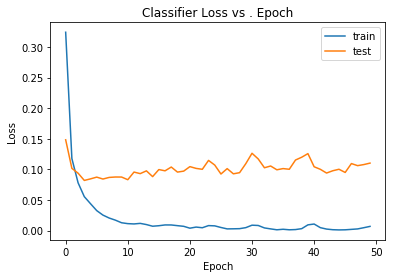

In [0]:
#Plot loss vs epoch
plt.plot(model_classifier_data.history['loss'])
plt.plot(model_classifier_data.history['val_loss'])
plt.title('Classifier Loss vs . Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

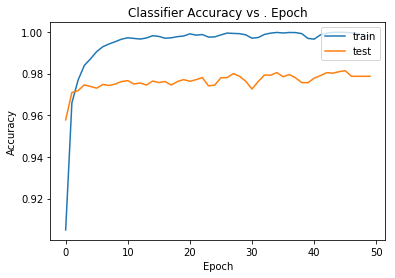

In [0]:
#Plot accuracy vs epoch
plt.plot(model_classifier_data.history['acc'])
plt.plot(model_classifier_data.history['val_acc'])
plt.title('Classifier Accuracy vs . Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [0]:
#Print accuracy of classifier on MNIST testing data
print("Accuracy : %.2f%%" %(score[1]*100))

Accuracy : 97.87%


In [0]:
# Edit the classifier name fed into KerasModel Wrapper with the name of the 
# classifier from above and then run this block

#Get TensorFlow Session to pass into Cleverhans modules
sess = backend.get_session()

#Create wrapper for classifier model so that it can be passed into Cleverhans modules
wrap = KerasModelWrapper(model_classifier)

#Part 2: The Fast Gradient Method (FGM)

In [0]:
#Implementing the FGSM attack

#FGM Instance on trained classifier from Part 1
fgsm = FastGradientMethod(wrap, sess=sess)

#Attack parameters
fgsm_params = {'eps':0.25, 'clip_min':0.0, 'clip_max':1.0}

#Generate adversarial data
fgsm_adv_data_test = fgsm.generate_np(data_test, **fgsm_params)

#Evaluate accuracy on target classifier 
fgsm_adv_score = model_classifier.evaluate(fgsm_adv_data_test, labels_test)
print('FGSM Adversarial Attack Accuracy : %.2f%%' %(fgsm_adv_score[1]*100))


10000/10000 [==============================] - 1s 101us/step
FGSM Adversarial Attack Accuracy : 8.12%


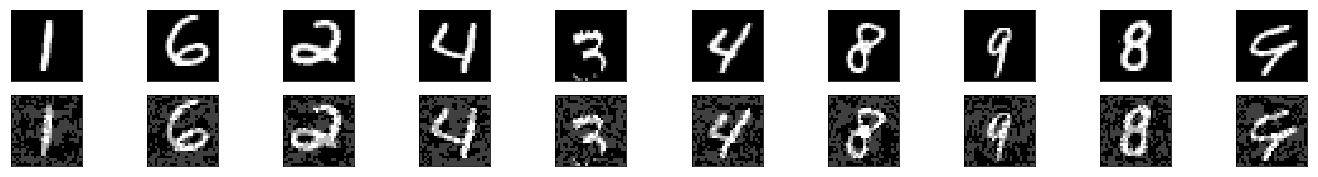

In [0]:
#Show ten original samples and their corresponding adversarial samples
num_images = 10
np.random.seed(42)
random_original_samples = np.random.randint(data_test.shape[0], size=num_images)
random_adversarial_samples = np.random.randint(fgsm_adv_data_test.shape[0], size=num_images)
plt.figure(figsize=(24, 6))

for i, image_idx in enumerate(random_original_samples):
    # plot original image
    ax = plt.subplot(4, num_images, i + 1)
    plt.imshow(data_test[image_idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot adversarial image
    ax = plt.subplot(4, num_images, num_images + i + 1)
    plt.imshow(fgsm_adv_data_test[image_idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [0]:
#Implementing Detection via Autoencoders

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create and train the autoencoder using the mean squared error loss and adam optimizer
ae_model = autoencoder()
ae_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

ae_model_history = ae_model.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=50, batch_size=256, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0376 - acc: 0.0093 - val_loss: 0.0158 - val_acc: 0.0111
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0117 - acc: 0.0118 - val_loss: 0.0089 - val_acc: 0.0136
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0081 - acc: 0.0117 - val_loss: 0.0069 - val_acc: 0.0121
Epoch 4/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0064 - acc: 0.0132 - val_loss: 0.0058 - val_acc: 0.0112
Epoch 5/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.0055 - acc: 0.0133 - val_loss: 0.0050 - val_acc: 0.0115
Epoch 6/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0049 - acc: 0.0134 - val_loss: 0.0045 - val_acc: 0.0122
Epoch 7/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0044 - acc: 0.0130 - val_loss: 0.0041 - val_acc

In [0]:
#Using the autoencoder for detection and to determine a threshold 

# Create adversarial examples using FGSM on training data
fgsm_adv_data_train = fgsm.generate_np(data_train, **fgsm_params)

# Obtain reconstruction errors on training set and determine a threshold 
data_train_adv_reconstructions = ae_model.predict(fgsm_adv_data_train)
train_error = keras.losses.mean_squared_error(fgsm_adv_data_train, data_train_adv_reconstructions)

# Convert error tensor into NumPy array 
# CHANGE NAME 'error' TO WHAT YOU CALLED IT ABOVE
train_error = train_error.eval(session=sess)

# Determine threshold (based on min in this case) and print it 
min_train_error = min(train_error)

print("The minimum error (Threshold) : ", min_train_error)

# Calculate error of adversarial testing set
data_test_adv_reconstructions = ae_model.predict(fgsm_adv_data_test)
test_error = keras.losses.mean_squared_error(fgsm_adv_data_test, data_test_adv_reconstructions)
test_error = test_error.eval(session=sess)

data_test_reconstructions = ae_model.predict(data_test)
test_error_data_test = keras.losses.mean_squared_error(data_test, data_test_reconstructions)
test_error_data_test = test_error_data_test.eval(session=sess)

# Determine how many examples are above threshold and consider them adversarial
# (true positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold
true_positive_count = 0
true_positive = []
for i in test_error:
  if i > min_train_error:
    true_positive.append(i)
    true_positive_count = true_positive_count + 1


# Print number of true positive samples
print("The number of true positive samples : ", true_positive_count)

# Determine false positives on benign testing set

# Determine how many examples are above threshold and consider them adversarial
# (false positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold
false_positive_count = 0
false_positive = []
for i in test_error_data_test:
  if i > min_train_error:
    false_positive.append(i)
    false_positive_count = false_positive_count + 1
    
# Print number of false positive samples
print("The number of false positive samples : ", false_positive_count)  

('The minimum error (Threshold) : ', 0.021254696)
('The number of true positive samples : ', 10000)
('The number of false positive samples : ', 0)


#Part 3: Projected Gradient Descent

In [0]:
#Implementing the PGD attack

#PGD Instance on trained classifier from Part 1
pgd = MadryEtAl(wrap, sess=sess)

#Attack parameters
pgd_params = {'eps':0.25, 'eps_iter':0.01, 'nb_iter':20, 'clip_min':0.0, 'clip_max':1.0}

#Generate adversarial data
pgd_adv_data_test = pgd.generate_np(data_test, **pgd_params)

#Evaluate accuracy of perturbed data on target classifier
pgd_adv_score = model_classifier.evaluate(pgd_adv_data_test, labels_test)
print("Accuracy of PGD adversarial attack : ", pgd_adv_score[1]*100)

10000/10000 [==============================] - 2s 222us/step
('Accuracy of PGD adversarial attack : ', 1.5)


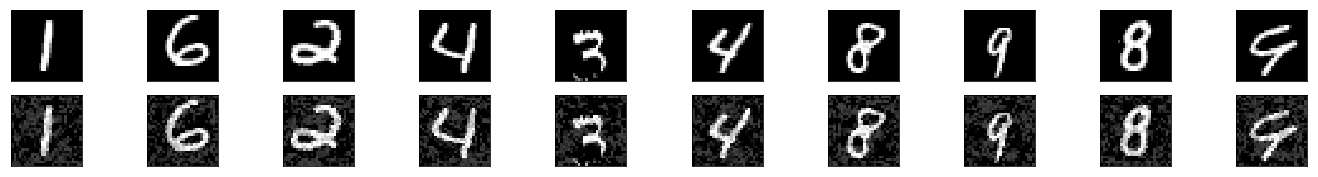

In [0]:
#Show ten original samples and their corresponding adversarial samples
num_images = 10
np.random.seed(42)
random_original_samples = np.random.randint(data_test.shape[0], size=num_images)
random_adversarial_samples = np.random.randint(pgd_adv_data_test.shape[0], size=num_images)
plt.figure(figsize=(24, 6))

for i, image_idx in enumerate(random_original_samples):
    # plot original image
    ax = plt.subplot(4, num_images, i + 1)
    plt.imshow(data_test[image_idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot adversarial image
    ax = plt.subplot(4, num_images, num_images + i + 1)
    plt.imshow(pgd_adv_data_test[image_idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [0]:
#Implementing the adversarial training defense
pgd_adv_data_train = pgd.generate_np(data_train, **pgd_params)

pgd_classifier = model_classifier

pgd_classifier.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
total_data = np.concatenate((pgd_adv_data_train, data_train), axis=0)
total_labels = np.concatenate((labels_train, labels_train), axis=0)
pgd_classifier_history = pgd_classifier.fit(total_data,total_labels, validation_data = (data_test, labels_test), epochs=50, batch_size=256, shuffle=True)
pgd_score = pgd_classifier.evaluate(data_train, labels_train)

print("Accuracy of PGD adversarial classifier : ", pgd_score[1]*100)

Train on 120000 samples, validate on 10000 samples
Epoch 1/50
120000/120000 [==============================] - 7s 57us/step - loss: 0.9940 - acc: 0.8760 - val_loss: 0.1164 - val_acc: 0.9698
Epoch 2/50
120000/120000 [==============================] - 5s 41us/step - loss: 0.0679 - acc: 0.9790 - val_loss: 0.0910 - val_acc: 0.9754
Epoch 3/50
120000/120000 [==============================] - 5s 40us/step - loss: 0.0356 - acc: 0.9891 - val_loss: 0.0834 - val_acc: 0.9777
Epoch 4/50
120000/120000 [==============================] - 5s 40us/step - loss: 0.0219 - acc: 0.9935 - val_loss: 0.0833 - val_acc: 0.9765
Epoch 5/50
120000/120000 [==============================] - 5s 40us/step - loss: 0.0144 - acc: 0.9959 - val_loss: 0.0870 - val_acc: 0.9778
Epoch 6/50
120000/120000 [==============================] - 5s 40us/step - loss: 0.0108 - acc: 0.9970 - val_loss: 0.0903 - val_acc: 0.9767
Epoch 7/50
120000/120000 [==============================] - 5s 41us/step - loss: 0.0081 - acc: 0.9976 - val_loss: 0

In [0]:
#Using the defense to evaluate the accuracy of the perturbed data
pgd_score_on_perturbed_data = pgd_classifier.evaluate(pgd_adv_data_test, labels_test)
print("Accuracy of PGD adversarial classifier on perturbed test data : %2f%%" %(pgd_score_on_perturbed_data[1]*100))

10000/10000 [==============================] - 1s 70us/step
Accuracy of PGD adversarial classifier on perturbed test data : 97.800000%


#Part 4: Carlini and Wagner Attack

In [0]:
#Implementing the CW attack

#CW Instance on trained classifier from Part 1
cw = CarliniWagnerL2(wrap, sess=sess)


#Attack parameters
cw_params = {"binary_search_steps":1, "y":None, "learning_rate": 1.25, "batch_size": 16, "initial_const": 10, "clip_min": 0.00, "clip_max": 1.0}


#Generate adversarial data
cw_adv_data_test = cw.generate_np(data_test, **cw_params)


#Evaluate accuracy of perturbed data on target classifier
cw_adv_score = model_classifier.evaluate(cw_adv_data_test, labels_test)

print("Accuracy of Carlini and Wagner adversarial attack : ", cw_adv_score[1]*100)

W1112 16:48:12.061264 140197967017856 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/cleverhans/attacks_tf.py:725: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1112 16:48:12.384870 140197967017856 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/cleverhans/attacks.py:909: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.

10000/10000 [==============================] - 2s 205us/step
('Accuracy of Carlini and Wagner adversarial attack : ', 1.4500000000000002)


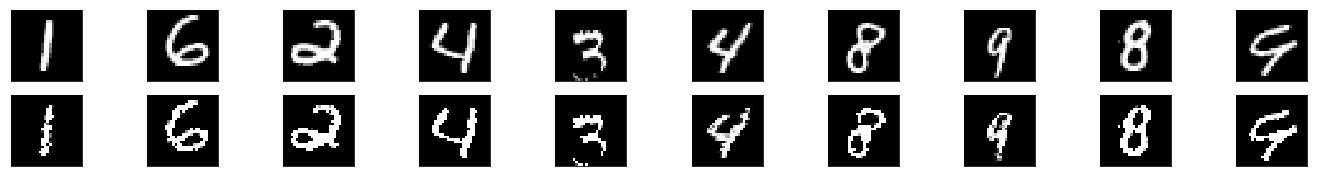

In [0]:
#Show ten original samples and their corresponding adversarial samples
num_images = 10
np.random.seed(42)
random_original_samples = np.random.randint(data_test.shape[0], size=num_images)
random_adversarial_samples = np.random.randint(cw_adv_data_test.shape[0], size=num_images)
plt.figure(figsize=(24, 6))

for i, image_idx in enumerate(random_original_samples):
    # plot original image
    ax = plt.subplot(4, num_images, i + 1)
    plt.imshow(data_test[image_idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot adversarial image
    ax = plt.subplot(4, num_images, num_images + i + 1)
    plt.imshow(cw_adv_data_test[image_idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [0]:
#Implementing the dimensionality reduction (PCA) defense 

#Calculate PCA projection
pca = PCA(100)
pca.fit(data_train)
pca_train = pca.transform(data_train)
pca_test = pca.transform(data_test)

#Transform perturbed CW data using the subspace from the original training data
#FILL THIS IN 

# create model for PCA
def pca_model():
    model = Sequential()
    model.add(Dense(100, input_dim = 100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation = 'softmax'))
    return model

#Create model graph, compile it, and train it using pca_train lables_train 
pca_model = pca_model()
pca_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
pca_model_history = pca_model.fit(pca_train, labels_train, validation_data=(pca_test, labels_test), epochs=50, batch_size=256, shuffle=True)
pca_model.summary()
pca_model_score = pca_model.evaluate(pca_test, labels_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.4475 - acc: 0.8670 - val_loss: 0.1813 - val_acc: 0.9476
Epoch 2/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1526 - acc: 0.9565 - val_loss: 0.1251 - val_acc: 0.9620
Epoch 3/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1024 - acc: 0.9704 - val_loss: 0.1003 - val_acc: 0.9679
Epoch 4/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0757 - acc: 0.9782 - val_loss: 0.0864 - val_acc: 0.9726
Epoch 5/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0588 - acc: 0.9830 - val_loss: 0.0801 - val_acc: 0.9751
Epoch 6/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0458 - acc: 0.9868 - val_loss: 0.0770 - val_acc: 0.9773
Epoch 7/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0376 - acc: 0.9890 - val_loss: 0.0771 - val_acc

In [0]:
#Using the defense (and comparing to baseline accuracy)
cw_adv_data_test = pca.transform(cw_adv_data_test)
cw_defense_score = pca_model.evaluate(cw_adv_data_test, labels_test)
print("Accuracy of defense through PCA : %2f%%" %(cw_defense_score[1]*100))

10000/10000 [==============================] - 1s 78us/step
Accuracy of defense through PCA : 82.670000%


#Part 5: DeepFool 

In [0]:
#Implementing the DeepFool attack

#DeepFool Instance on trained classifier from Part 1
deep_fool = DeepFool(wrap, sess=sess)

#Attack parameters
deep_fool_params = {"nb_candidate": 10, "max_iter": 50, "clip_min": 0.0, "clip_max": 1.0}


#Generate adversarial data
deep_fool_adv_data_test = deep_fool.generate_np(data_test, **deep_fool_params)


#Evaluate accuracy of perturbed data on target classifier
deep_fool_adv_score = model_classifier.evaluate(deep_fool_adv_data_test, labels_test)
print("Accuracy of DeepFool Adversarial attack : %2f%%" %(deep_fool_adv_score[1]*100))

W1112 19:27:14.166251 140230100232064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/cleverhans/utils_tf.py:368: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W1112 19:27:15.962651 140230100232064 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/cleverhans/attacks.py:1119: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is no

10000/10000 [==============================] - 1s 72us/step
Accuracy of DeepFool Adversarial attack : 1.470000%


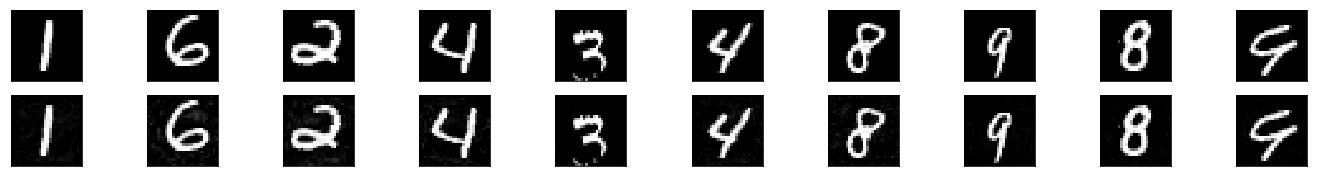

In [0]:
#Show ten original samples and their corresponding adversarial samples
num_images = 10
np.random.seed(42)
random_original_samples = np.random.randint(data_test.shape[0], size=num_images)
random_adversarial_samples = np.random.randint(deep_fool_adv_data_test.shape[0], size=num_images)
plt.figure(figsize=(24, 6))

for i, image_idx in enumerate(random_original_samples):
    # plot original image
    ax = plt.subplot(4, num_images, i + 1)
    plt.imshow(data_test[image_idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot adversarial image
    ax = plt.subplot(4, num_images, num_images + i + 1)
    plt.imshow(deep_fool_adv_data_test[image_idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [0]:
#Implementing the Denoising Autoencoder Defense

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create training data for DAE 
df_attack_data_train = deep_fool.generate_np(data_train, **deep_fool_params)
data_total_train = np.concatenate([df_attack_data_train, data_train])

#Create and train DAE graph
autoencoder = autoencoder()
autoencoder.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
autoencoder_history = autoencoder.fit(data_total_train, data_total_train, validation_data = (data_test, data_test), epochs=50, batch_size=256, shuffle=True)

W1112 19:30:47.697460 140230100232064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



Train on 120000 samples, validate on 10000 samples
Epoch 1/50
120000/120000 [==============================] - 3s 26us/step - loss: 0.0247 - acc: 0.0101 - val_loss: 0.0092 - val_acc: 0.0137
Epoch 2/50
120000/120000 [==============================] - 2s 21us/step - loss: 0.0077 - acc: 0.0127 - val_loss: 0.0058 - val_acc: 0.0112
Epoch 3/50
120000/120000 [==============================] - 2s 20us/step - loss: 0.0055 - acc: 0.0137 - val_loss: 0.0045 - val_acc: 0.0139
Epoch 4/50
120000/120000 [==============================] - 2s 20us/step - loss: 0.0045 - acc: 0.0150 - val_loss: 0.0038 - val_acc: 0.0127
Epoch 5/50
120000/120000 [==============================] - 2s 21us/step - loss: 0.0038 - acc: 0.0157 - val_loss: 0.0033 - val_acc: 0.0138
Epoch 6/50
120000/120000 [==============================] - 3s 21us/step - loss: 0.0034 - acc: 0.0158 - val_loss: 0.0030 - val_acc: 0.0141
Epoch 7/50
120000/120000 [==============================] - 2s 20us/step - loss: 0.0031 - acc: 0.0162 - val_loss: 0

In [0]:
#Using the defense

#Use DAE to to remove adversarial perturbation 
deep_fool_reconstructions = ae_model.predict(deep_fool_adv_data_test)
deep_fool_score = model_classifier.evaluate(deep_fool_reconstructions, labels_test)

#Evaluate accuracy of FGM samples after denoising 
print("Accuracy of DeepFool Defense through DAE : %2f%%" %(deep_fool_score[1]*100))

10000/10000 [==============================] - 0s 40us/step
Accuracy of DeepFool Defense through DAE : 97.680000%


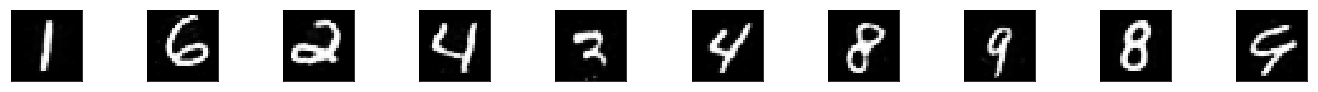

In [0]:
#Show ten samples of adversarial samples after denoising
num_images = 10
np.random.seed(42)
random_adversarial_samples = np.random.randint(deep_fool_reconstructions.shape[0], size=num_images)
plt.figure(figsize=(24, 6))

for i, image_idx in enumerate(random_original_samples):
    ax = plt.subplot(4, num_images, num_images + i + 1)
    plt.imshow(deep_fool_reconstructions[image_idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()